# Multiple Linear Regression without SK-Learn

Dataset: [Graduate Admission 2](https://www.kaggle.com/mohansacharya/graduate-admissions)

### Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
print(os.listdir('./')) #Check File Directory For Identify DataSets

['.ipynb_checkpoints', 'Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv', 'archive.zip', 'Multiple Linear Regression with SK-Learn.ipynb', 'Multiple Linear Regression without SK-Learn.ipynb', 'Others']


### Data Loader & Pre-Processing

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv', delimiter=',', ) #Read From Dataset File 
df.dataframeName = 'Admission_Predict_Ver1.1.csv' #Set Dataframe Name
nRow, nCol = df.shape #Extract Row and Column from DataFrame Shape
df=df.drop(columns=['Serial No.']) #Drop 'Serial No.' Column From DataFrame
print(f'There are {nRow} rows and {nCol} columns')

There are 500 rows and 9 columns


In [4]:
df.head() #Check Some Top Rows From DataFrame

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [5]:
#Rename Column Name for Easy to Use
df.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [6]:
df.head() #Check Some Rows from Top 

GRE  TOEFL  University_Rating  SOP  LOR   CGPA  Research  Chance_of_Admit
0  337    118                  4  4.5   4.5  9.65         1             0.92
1  324    107                  4  4.0   4.5  8.87         1             0.76
2  316    104                  3  3.0   3.5  8.00         1             0.72
3  322    110                  3  3.5   2.5  8.67         1             0.80
4  314    103                  2  2.0   3.0  8.21         0             0.65

In [7]:
#calculating some statistical data like percentile, 
#mean and std of the numerical values of the DataFrame
df.describe() 

GRE       TOEFL  University_Rating         SOP       LOR   \
count  500.000000  500.000000         500.000000  500.000000  500.00000   
mean   316.472000  107.192000           3.114000    3.374000    3.48400   
std     11.295148    6.081868           1.143512    0.991004    0.92545   
min    290.000000   92.000000           1.000000    1.000000    1.00000   
25%    308.000000  103.000000           2.000000    2.500000    3.00000   
50%    317.000000  107.000000           3.000000    3.500000    3.50000   
75%    325.000000  112.000000           4.000000    4.000000    4.00000   
max    340.000000  120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance_of_Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    1.000000          0.72000  
75%      9.040000    1.000000          0.82000  
max      9.920000    1.000000          0.97000

In [8]:
c=df.describe() #Store all Values from 'describe()'
theta=[] #List of Theta Initialize
x=[] # List of X Initialize
i=0
for col in c:
    if col != "Chance_of_Admit": #Skip 'Y' Column
        x.append(df[col]) #Add Column data to List for X1 to Xn
    print("Theta",i,"-",c[col]['mean'])
    theta.append(c[col]['mean']) #Append Value of Theta in List
    i+=1
y = df['Chance_of_Admit'] #Initialize Y

Theta 0 - 316.472
Theta 1 - 107.192
Theta 2 - 3.114
Theta 3 - 3.374
Theta 4 - 3.484
Theta 5 - 8.576439999999998
Theta 6 - 0.56
Theta 7 - 0.72174


In [9]:
#Check Theta's Values
print("Theta Values: ",theta)


Theta Values:  [316.472, 107.192, 3.114, 3.374, 3.484, 8.576439999999998, 0.56, 0.72174]


In [10]:
df['diff']=np.NaN # Squared distance
df['pred']=np.NaN # prediction

## Training

In [11]:
epoch = int(input('Enter epoch no. :')) # Input for number of epochs

Enter epoch no. :100


In [12]:
cost_ls=[]
for step in range(epoch):
    t0,t1,t2,t3,t4,t5,t6,t7=(theta) #Extract Values from List of Theta
    x1,x2,x3,x4,x5,x6,x7=(x) #Extract Values from List of X
    #Hypothesis function
    df['pred']=t0+t1*x1+t2*x2+t3*x3+t4*x4+t5*x5+t6*x6+t7*x7
    
    #Squared error/difference
    df['diff']=(df.pred-df.Chance_of_Admit)**2
    
    m = len(y) # Number of datapoints
    
    cost = (df['diff'].sum())/(2*m) # Cost function
    cost_ls.append(cost) #Append Value of Every Epoch
    print('\n\n')
    print('For step : ', step+1)
    print('Cost is : {}'.format(cost))
    
    step_size = 0.000001 #initializing learning rate
    
    # Gradient decent optimization of theta values
    
    theta[0] = theta[0] - (step_size/m)*(np.sqrt(df['diff']).sum())
    theta[1] = theta[1] - (step_size/m)*((np.sqrt(df['diff'])*x1).sum())
    theta[2] = theta[2] - (step_size/m)*((np.sqrt(df['diff'])*x2).sum())
    theta[3] = theta[3] - (step_size/m)*((np.sqrt(df['diff'])*x3).sum())
    theta[4] = theta[4] - (step_size/m)*((np.sqrt(df['diff'])*x4).sum())
    theta[5] = theta[5] - (step_size/m)*((np.sqrt(df['diff'])*x5).sum())
    theta[6] = theta[6] - (step_size/m)*((np.sqrt(df['diff'])*x6).sum())
    theta[7] = theta[7] - (step_size/m)*((np.sqrt(df['diff'])*x7).sum())
    
    print('Gradient Decent Optimized Thetas: ', theta)





For step :  1
Cost is : 600385920.734564
Gradient Decent Optimized Thetas:  [316.43736983827824, 96.21859601954671, -0.6043270709781994, 3.2652565878086803, 3.3663994358779, 8.455180467867198, 0.26237724954940134, 0.70200125392232]



For step :  2
Cost is : 473532354.80532783
Gradient Decent Optimized Thetas:  [316.4066147826834, 86.47316678619075, -3.906511958023119, 3.16868736679928, 3.261963507899899, 8.34749353474166, -0.0019377759525835425, 0.6844725532785806]



For step :  3
Cost is : 373481529.0026415
Gradient Decent Optimized Thetas:  [316.37930118608904, 77.81829471564987, -6.839123415442948, 3.082929973422933, 3.1692190159199223, 8.251860347054048, -0.23667240652560623, 0.6689065809934241]



For step :  4
Cost is : 294570324.0137186
Gradient Decent Optimized Thetas:  [316.3550439290284, 70.13194005819207, -9.443518880502982, 3.0067745006112245, 3.0868576195383683, 8.166932019867621, -0.44513686207451164, 0.655083696224387]



For step :  5
Cost is : 232332174.31838647
G




For step :  39
Cost is : 78651.0088495926
Gradient Decent Optimized Thetas:  [316.1655083058159, 10.087158450815338, -29.777984255340826, 2.413145314206107, 2.4445757877923913, 7.50423509307063, -2.0730601894004135, 0.5473897996383303]



For step :  40
Cost is : 63298.10016605005
Gradient Decent Optimized Thetas:  [316.1651680861764, 9.979826503712506, -29.813962988472035, 2.4121285584280754, 2.4434661070885992, 7.503076420312511, -2.075950390002613, 0.5472072439366941]



For step :  41
Cost is : 51189.058924742225
Gradient Decent Optimized Thetas:  [316.16486557904744, 9.884444734214219, -29.845893699524275, 2.41123030203727, 2.4424844547917552, 7.502049688036006, -2.0785165165376744, 0.5470462805667183]



For step :  42
Cost is : 41633.979128576706
Gradient Decent Optimized Thetas:  [316.1645965748268, 9.799679201823965, -29.874228321833222, 2.4104373185189703, 2.441616536114837, 7.501140162341364, -2.080794746524781, 0.5469045028397841]



For step :  43
Cost is : 34094.527603

Gradient Decent Optimized Thetas:  [316.1597366617784, 8.258703186819236, -30.39615165591186, 2.3952026740912413, 2.4250796925201565, 7.484047927427554, -2.122599038453727, 0.5441179094412659]



For step :  78
Cost is : 53244.224463616236
Gradient Decent Optimized Thetas:  [316.15943114683535, 8.161410342013898, -30.42951484682351, 2.394190986215897, 2.423995837795695, 7.482945295595191, -2.1252590334173442, 0.5439323009936484]



For step :  79
Cost is : 64419.87850896609
Gradient Decent Optimized Thetas:  [316.1590913657608, 8.053258441948012, -30.46655963632393, 2.3930714922291143, 2.4227954517666896, 7.481722376514384, -2.1282136192796526, 0.5437270730970252]



For step :  80
Cost is : 78231.91294997212
Gradient Decent Optimized Thetas:  [316.15871340730524, 7.933008355131577, -30.507705026398618, 2.3918319914993895, 2.4214653154696006, 7.480365623792376, -2.1314963789256756, 0.5435000386100826]



For step :  81
Cost is : 95305.75975292998
Gradient Decent Optimized Thetas:  [316

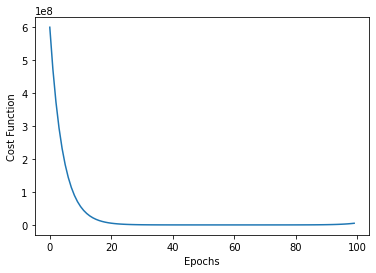

In [13]:
import matplotlib.pyplot as plt

x= [i for i in range(0,100)]

plt.plot(x, cost_ls)
 
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Cost Function')
 
# giving a title to my graph

 
# function to show the plot
plt.show()

## Evaluation & Visualization

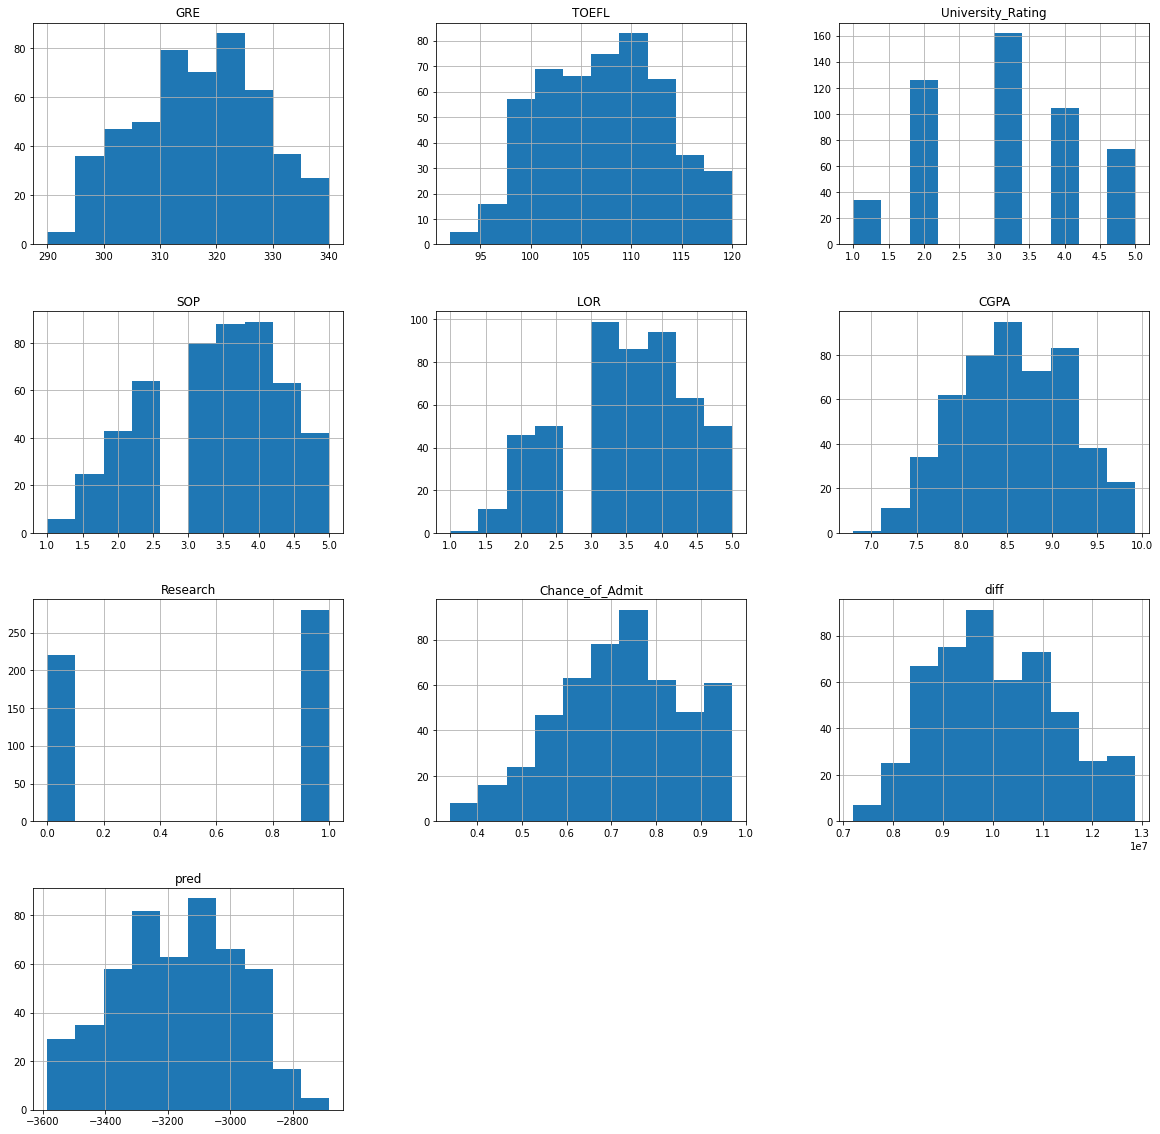

In [14]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

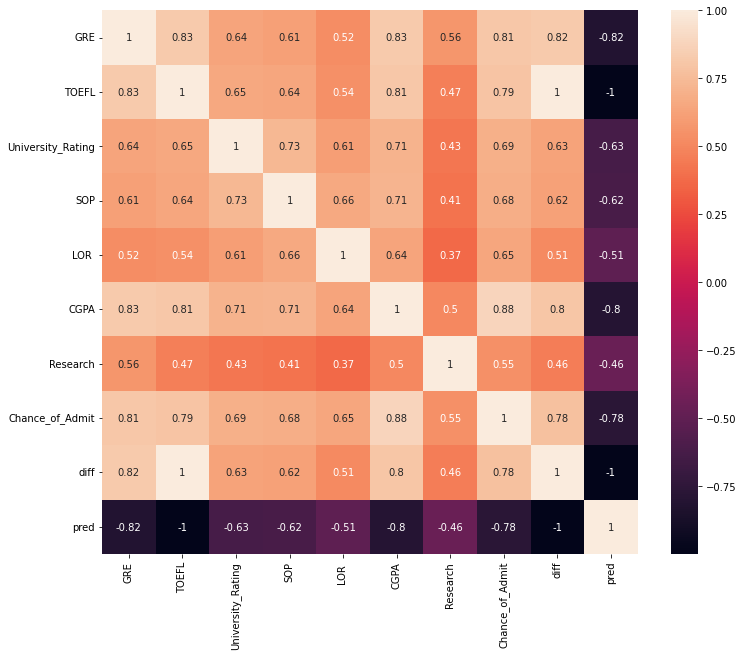

In [17]:
import seaborn as sns

plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr(),annot=True)

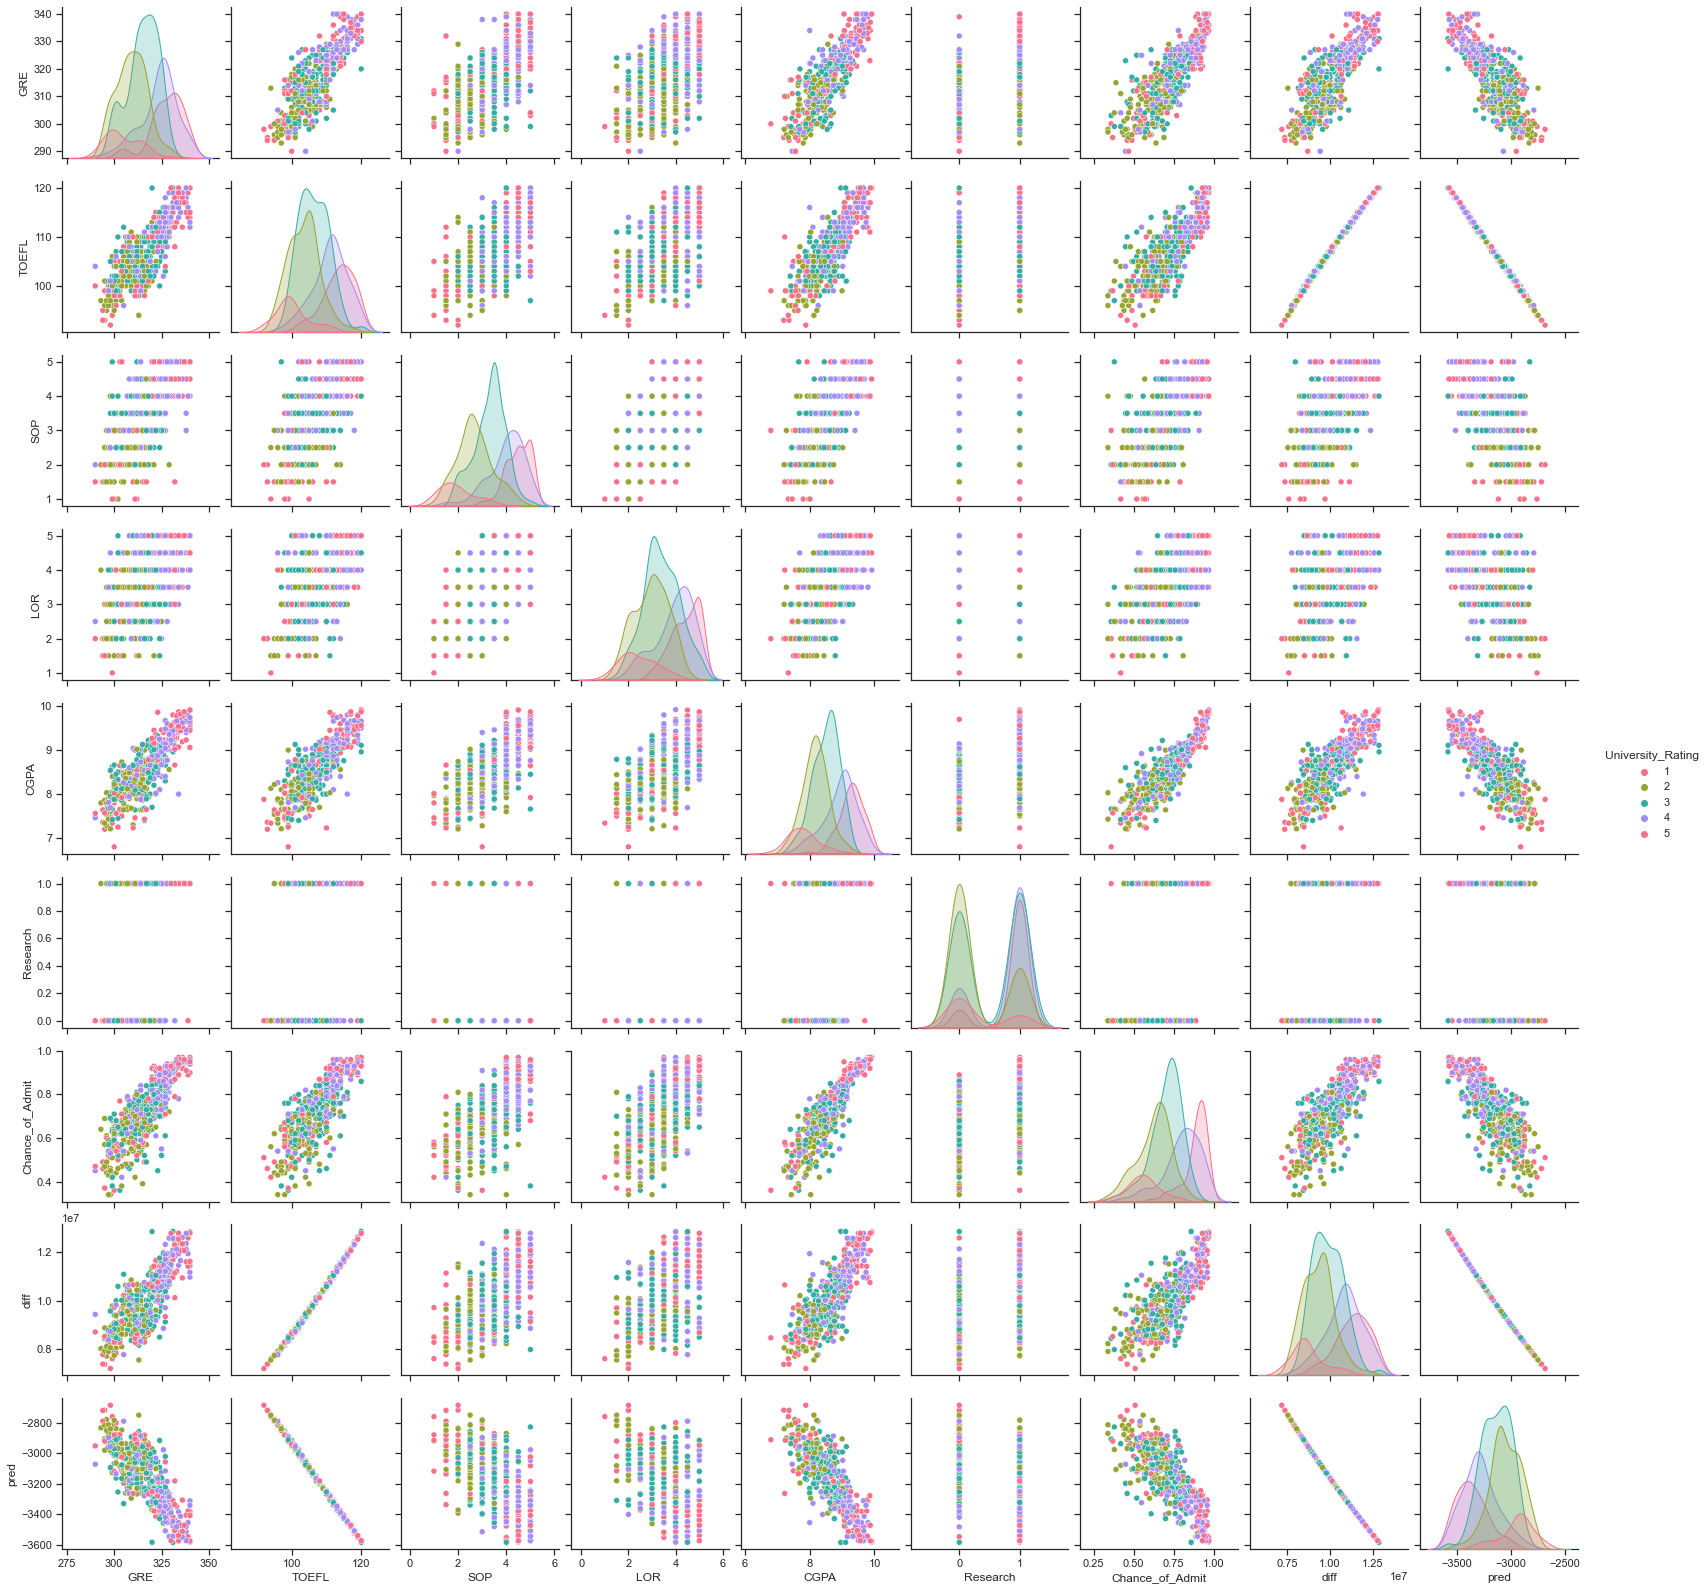

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="University_Rating", palette="husl")
plt.show()

In [19]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [20]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]